In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np # linear algebra
import pandas as pd #

In [6]:
df = pd.read_csv('layoffs_data.csv')
df.head()

,Company,Location,Industry,Laid_Off_Count,Date,Source,Funds_Raised,Stage,Date_Added,Country,Percentage,List_of_Employees_Laid_Off
0,Vedantu,Bengaluru,Education,385.0,2022-12-07,https://economictimes.indiatimes.com/tech/star...,292.0,Series E,2022-12-07 16:28:02,India,NaN,Unknown
1,Loft,Sao Paulo,Real Estate,312.0,2022-12-07,https://www.bloomberglinea.com/english/brazili...,788.0,Unknown,2022-12-08 06:26:02,Brazil,0.12,Unknown
2,Plaid,SF Bay Area,Finance,260.0,2022-12-07,https://techcrunch.com/2022/12/07/plaid-layoff...,734.0,Series D,2022-12-07 16:22:04,United States,0.20,https://docs.google.com/spreadsheets/d/1Tqw-Iu...
3,Motive,SF Bay Area,Transportation,237.0,2022-12-07,https://gomotive.com/blog/shoaib-makanis-messa...,567.0,Series F,2022-12-08 06:21:12,United States,0.06,Unknown
4,Relativity,Chicago,Legal,150.0,2022-12-07,https://www.chicagobusiness.com/technology/sof...,125.0,Private Equity,2022-12-08 06:22:20,United States,0.10,Unknown


In [7]:
df.shape

(1757, 12)

In [8]:
df.columns

Index(['Company', 'Location', 'Industry', 'Laid_Off_Count', 'Date', 'Source',
       'Funds_Raised', 'Stage', 'Date_Added', 'Country', 'Percentage',
       'List_of_Employees_Laid_Off'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1757 entries, 0 to 1756
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Company                     1757 non-null   object 
 1   Location                    1757 non-null   object 
 2   Industry                    1757 non-null   object 
 3   Laid_Off_Count              1237 non-null   float64
 4   Date                        1756 non-null   object 
 5   Source                      1757 non-null   object 
 6   Funds_Raised                1627 non-null   float64
 7   Stage                       1757 non-null   object 
 8   Date_Added                  1757 non-null   object 
 9   Country                     1757 non-null   object 
 10  Percentage                  1181 non-null   float64
 11  List_of_Employees_Laid_Off  1757 non-null   object 
dtypes: float64(3), object(9)
memory usage: 164.8+ KB


In [10]:
df.dtypes

Company                        object
Location                       object
Industry                       object
Laid_Off_Count                float64
Date                           object
Source                         object
Funds_Raised                  float64
Stage                          object
Date_Added                     object
Country                        object
Percentage                    float64
List_of_Employees_Laid_Off     object
dtype: object

In [11]:
df.describe()

,Laid_Off_Count,Funds_Raised,Percentage
count,1237.000000,1627.000000,1181.000000
mean,196.755861,865.169819,0.275006
std,565.534639,6348.170648,0.265847
min,3.000000,0.000000,0.000000
25%,31.000000,45.000000,0.100000
50%,70.000000,134.000000,0.190000
75%,150.000000,390.500000,0.320000
max,11000.000000,121900.000000,1.000000


In [12]:
df.isnull().sum()

Company                         0
Location                        0
Industry                        0
Laid_Off_Count                520
Date                            1
Source                          0
Funds_Raised                  130
Stage                           0
Date_Added                      0
Country                         0
Percentage                    576
List_of_Employees_Laid_Off      0
dtype: int64

In [13]:
df.Industry.unique()

array(['Education', 'Real Estate', 'Finance', 'Transportation', 'Legal',
       'Marketing', 'Retail', 'Product', 'Media', 'Other', 'Security',
       'Crypto', 'Healthcare', 'Unknown', 'Travel', 'Fitness', 'Consumer',
       'Support', 'Food', 'Data', 'Recruiting', 'Energy', 'Sales',
       'Infrastructure', 'Logistics', 'HR', 'Aerospace', 'Construction'],
      dtype=object)

In [14]:
df.Stage.unique()

array(['Series E', 'Unknown', 'Series D', 'Series F', 'Private Equity',
       'Acquired', 'IPO', 'Series C', 'Series B', 'Series A', 'Series J',
       'Seed', 'Series H', 'Series G', 'Series I'], dtype=object)

In [15]:
df.Country.unique()

array(['India', 'Brazil', 'United States', 'Israel', 'United Kingdom',
       'Australia', 'Singapore', 'Indonesia', 'Argentina', 'Mexico',
       'Nigeria', 'Netherlands', 'Germany', 'Canada', 'Switzerland',
       'Egypt', 'Sweden', 'Ireland', 'Kenya', 'Luxembourg', 'China',
       'Spain', 'Estonia', 'Greece', 'Poland', 'Seychelles', 'Norway',
       'Belgium', 'Denmark', 'Hong Kong', 'New Zealand', 'Malaysia',
       'Hungary', 'Vietnam', 'Austria', 'Thailand', 'Romania',
       'Lithuania', 'Chile', 'Senegal', 'Pakistan',
       'United Arab Emirates', 'Colombia', 'Finland', 'Peru', 'Bahrain',
       'Turkey', 'Russia', 'Uruguay', 'Bulgaria', 'France', 'Portugal',
       'South Africa', 'Czech Republic', 'Myanmar'], dtype=object)

In [16]:
df.query('Percentage == 1.00')

,Company,Location,Industry,Laid_Off_Count,Date,Source,Funds_Raised,Stage,Date_Added,Country,Percentage,List_of_Employees_Laid_Off
31,Lora DiCarlo,Bend,Consumer,NaN,2022-12-02,https://techcrunch.com/2022/12/02/looks-like-s...,9.0,Unknown,2022-12-04 23:09:00,United States,1.0,Unknown
53,Bitfront,SF Bay Area,Crypto,NaN,2022-11-29,https://www.reuters.com/technology/crypto-exch...,NaN,Unknown,2022-11-30 05:54:28,United States,1.0,Unknown
67,BlockFi,New York City,Crypto,NaN,2022-11-28,https://decrypt.co/115744/crypto-lender-blockf...,1000.0,Series E,2022-11-30 06:05:58,United States,1.0,Unknown
79,Assure,Salt Lake City,Finance,NaN,2022-11-23,https://www.axios.com/2022/11/23/assure-shutdo...,2.0,Seed,2022-11-25 04:07:03,United States,1.0,Unknown
80,GoodGood,Toronto,Retail,NaN,2022-11-23,https://betakit.com/one-year-after-raising-6-5...,6.0,Seed,2022-11-25 04:07:55,Canada,1.0,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...
1739,Service,Los Angeles,Travel,NaN,2020-03-20,https://techcrunch.com/2020/03/16/travel-savin...,5.0,Seed,2020-04-01 21:17:10,United States,1.0,Unknown
1742,Ejento,SF Bay Area,Recruiting,84.0,2020-03-19,https://layoffs.fyi/list/ejento/,NaN,Unknown,2020-03-28 20:52:49,United States,1.0,Unknown
1746,Popin,New York City,Fitness,NaN,2020-03-19,https://www.businessinsider.com/fitness-app-po...,13.0,Unknown,2020-04-06 23:47:12,United States,1.0,Unknown
1750,Help.com,Austin,Support,16.0,2020-03-16,LinkedIn,6.0,Seed,2020-04-16 06:36:06,United States,1.0,Unknown


In [17]:
def new_columns():
    df.drop(['List_of_Employees_Laid_Off','Source','Date_Added'], axis=1, inplace=True)
    df.rename(columns=lambda x: x.strip().lower(),inplace=True)
    return new_columns
new_columns()
df.head()

,company,location,industry,laid_off_count,date,funds_raised,stage,country,percentage
0,Vedantu,Bengaluru,Education,385.0,2022-12-07,292.0,Series E,India,NaN
1,Loft,Sao Paulo,Real Estate,312.0,2022-12-07,788.0,Unknown,Brazil,0.12
2,Plaid,SF Bay Area,Finance,260.0,2022-12-07,734.0,Series D,United States,0.20
3,Motive,SF Bay Area,Transportation,237.0,2022-12-07,567.0,Series F,United States,0.06
4,Relativity,Chicago,Legal,150.0,2022-12-07,125.0,Private Equity,United States,0.10


In [18]:
def created_columns():
    df['date'] = pd.to_datetime(df['date'])
    df['month'] = df['date'].dt.month
    df['day'] = df['date'].dt.day_name()
    df['year'] = df['date'].dt.year
    return created_columns
created_columns()
df.dtypes

company                   object
location                  object
industry                  object
laid_off_count           float64
date              datetime64[ns]
funds_raised             float64
stage                     object
country                   object
percentage               float64
month                    float64
day                       object
year                     float64
dtype: object

In [19]:
df.head()

,company,location,industry,laid_off_count,date,funds_raised,stage,country,percentage,month,day,year
0,Vedantu,Bengaluru,Education,385.0,2022-12-07,292.0,Series E,India,NaN,12.0,Wednesday,2022.0
1,Loft,Sao Paulo,Real Estate,312.0,2022-12-07,788.0,Unknown,Brazil,0.12,12.0,Wednesday,2022.0
2,Plaid,SF Bay Area,Finance,260.0,2022-12-07,734.0,Series D,United States,0.20,12.0,Wednesday,2022.0
3,Motive,SF Bay Area,Transportation,237.0,2022-12-07,567.0,Series F,United States,0.06,12.0,Wednesday,2022.0
4,Relativity,Chicago,Legal,150.0,2022-12-07,125.0,Private Equity,United States,0.10,12.0,Wednesday,2022.0


In [20]:
df.fillna(0, inplace=True)
df.isnull().any()

company           False
location          False
industry          False
laid_off_count    False
date              False
funds_raised      False
stage             False
country           False
percentage        False
month             False
day               False
year              False
dtype: bool

In [21]:
def new_datatypes():
    columns = ['laid_off_count', 'year', 'month']
    for c in columns:
        df[c] = df[c].astype(int)
    return new_datatypes
new_datatypes()
df.dtypes

company            object
location           object
industry           object
laid_off_count      int64
date               object
funds_raised      float64
stage              object
country            object
percentage        float64
month               int64
day                object
year                int64
dtype: object

In [23]:
df.head()

,company,location,industry,laid_off_count,date,funds_raised,stage,country,percentage,month,day,year
0,Vedantu,Bengaluru,Education,385,2022-12-07 00:00:00,292.0,Series E,India,0.00,12,Wednesday,2022
1,Loft,Sao Paulo,Real Estate,312,2022-12-07 00:00:00,788.0,Unknown,Brazil,0.12,12,Wednesday,2022
2,Plaid,SF Bay Area,Finance,260,2022-12-07 00:00:00,734.0,Series D,United States,0.20,12,Wednesday,2022
3,Motive,SF Bay Area,Transportation,237,2022-12-07 00:00:00,567.0,Series F,United States,0.06,12,Wednesday,2022
4,Relativity,Chicago,Legal,150,2022-12-07 00:00:00,125.0,Private Equity,United States,0.10,12,Wednesday,2022


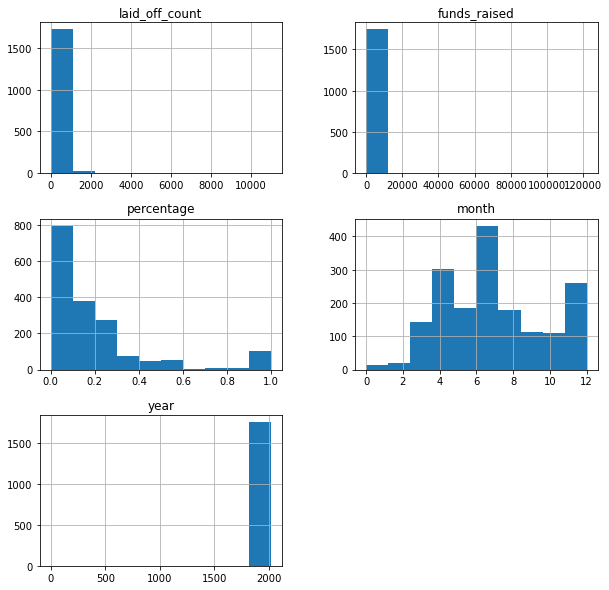

In [22]:
df.hist(figsize=(10,10));

In [24]:
df.groupby('year')['laid_off_count'].sum()

year
0            0
2020     80968
2021     15023
2022    147396
Name: laid_off_count, dtype: int64

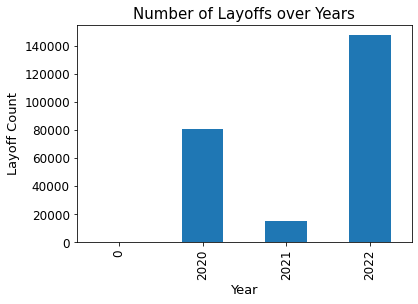

In [25]:
df.groupby('year')['laid_off_count'].sum().plot(kind='bar',fontsize=12)
plt.title('Number of Layoffs over Years',size=15)
plt.xlabel('Year',size=13)
plt.ylabel('Layoff Count',size=13);

In [26]:
df.groupby('country')['laid_off_count'].sum().sort_values(ascending=False)

country
United States           160389
India                    30986
Brazil                    7837
Singapore                 5603
Canada                    5199
Netherlands               5070
United Kingdom            4755
China                     4430
Germany                   4113
Indonesia                 2961
Israel                    2258
Sweden                    2014
Australia                 1215
United Arab Emirates       995
Hong Kong                  730
Nigeria                    491
Austria                    470
Russia                     400
Kenya                      349
Argentina                  323
Senegal                    300
Mexico                     270
Estonia                    267
Finland                    250
Denmark                    240
Ireland                    230
Myanmar                    200
Norway                     140
Romania                    140
Bulgaria                   120
Portugal                   115
Malaysia                   100


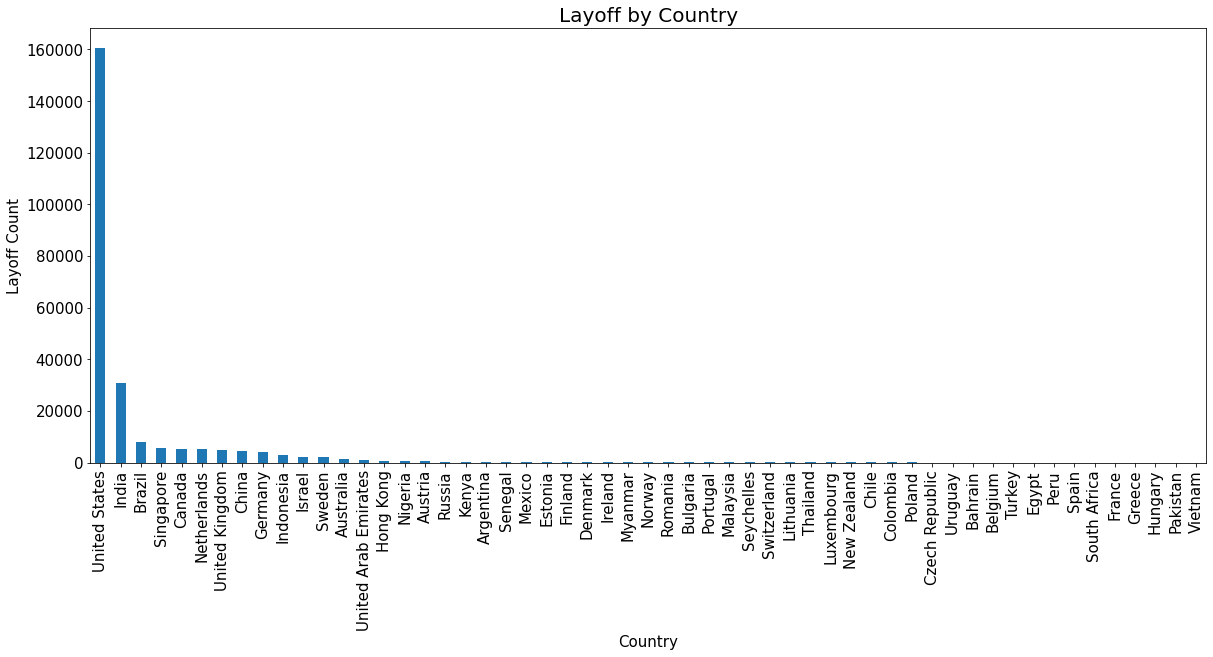

In [27]:
df.groupby('country')['laid_off_count'].sum().sort_values(ascending=False).plot(kind='bar',figsize=(20,8),fontsize=15)
plt.title('Layoff by Country',size=20)
plt.xlabel('Country',size=15)
plt.ylabel('Layoff Count',size=15);

In [28]:
proportion_of_US_layoff = round(df.groupby('country')['laid_off_count'].sum().sort_values(ascending=False)[0]/df.laid_off_count.sum(),3)
proportion_of_US_layoff

0.659

In [29]:
df.groupby('industry')['laid_off_count'].sum().sort_values(ascending=False)

industry
Transportation    29012
Consumer          28594
Retail            27571
Finance           20740
Food              19406
Real Estate       16334
Travel            15476
Healthcare        11900
Education         10743
Fitness            8688
Crypto             8060
Other              6407
Marketing          6383
Infrastructure     5358
Security           3938
Sales              3833
Construction       3820
Media              3112
Recruiting         2775
Logistics          2731
Data               2583
Support            1440
HR                 1342
Energy              802
Product             760
Aerospace           661
Legal               620
Unknown             298
Name: laid_off_count, dtype: int64

In [32]:
df.query('industry == "Unknown"')

,company,location,industry,laid_off_count,date,funds_raised,stage,country,percentage,month,day,year
22,DataRails,Tel Aviv,Unknown,30,2022-12-05 00:00:00,103.0,Series B,Israel,0.18,12,Monday,2022
48,Motional,Boston,Unknown,0,2022-11-30 00:00:00,0.0,Unknown,United States,0.00,11,Wednesday,2022
59,Proton.ai,Boston,Unknown,0,2022-11-29 00:00:00,20.0,Series A,United States,0.00,11,Tuesday,2022
161,InfluxData,SF Bay Area,Unknown,65,2022-11-10 00:00:00,119.0,Series D,United States,0.27,11,Thursday,2022
175,AvantStay,Los Angeles,Unknown,144,2022-11-09 00:00:00,686.0,Private Equity,United States,0.22,11,Wednesday,2022
206,Exodus,Nebraska City,Unknown,59,2022-11-04 00:00:00,60.0,Unknown,United States,0.22,11,Friday,2022


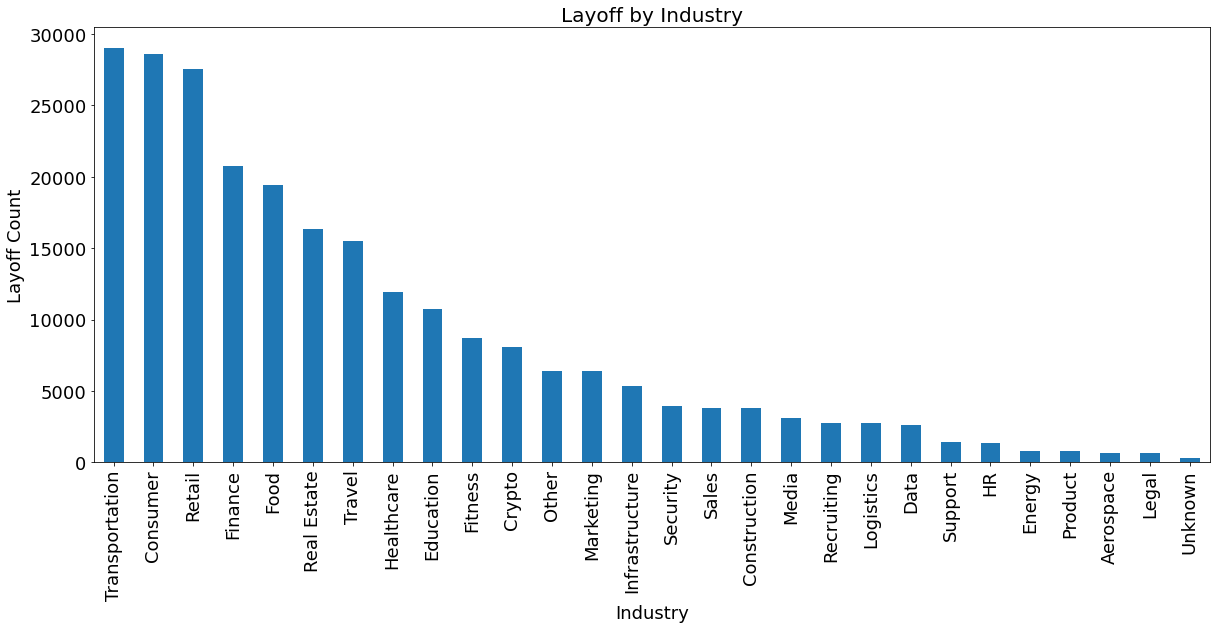

In [33]:
df.groupby('industry')['laid_off_count'].sum().sort_values(ascending=False).plot(kind='bar',figsize=(20,8),fontsize=18)
plt.title('Layoff by Industry',size=20)
plt.xlabel('Industry',size=18)
plt.ylabel('Layoff Count',size=18);

In [34]:
df.groupby('industry')['percentage'].mean().sort_values(ascending=False)

industry
Aerospace         0.376667
Product           0.255200
Recruiting        0.242500
Travel            0.237258
Crypto            0.236308
Fitness           0.232222
Legal             0.228750
Real Estate       0.224752
Education         0.217333
Construction      0.210000
Food              0.209771
Retail            0.205411
Infrastructure    0.195294
Healthcare        0.195081
Finance           0.179110
Consumer          0.177262
HR                0.161591
Media             0.159605
Transportation    0.155400
Support           0.152692
Logistics         0.152647
Marketing         0.151982
Other             0.148590
Unknown           0.148333
Security          0.130800
Data              0.125667
Energy            0.122727
Sales             0.055140
Name: percentage, dtype: float64

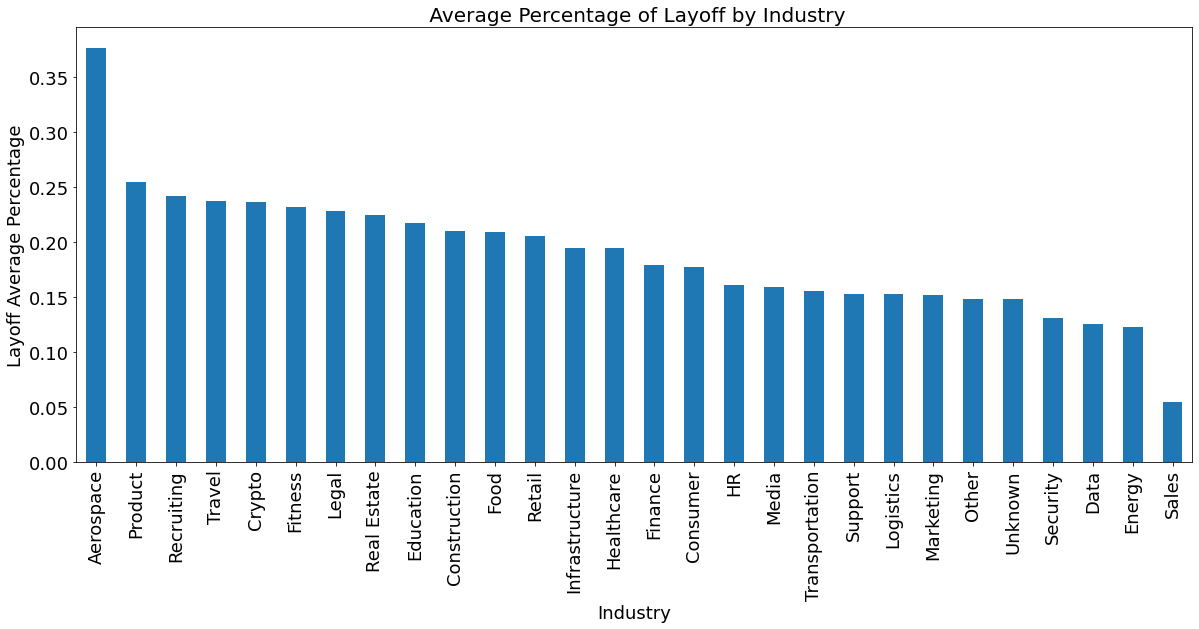

In [36]:
df.groupby('industry')['percentage'].mean().sort_values(ascending=False).plot(kind='bar',figsize=(20,8),fontsize=18)
plt.title(' Average Percentage of Layoff by Industry',size=20)
plt.xlabel('Industry',size=18)
plt.ylabel('Layoff Average Percentage',size=18);

In [37]:
df.groupby('stage')['laid_off_count'].sum().sort_values(ascending=False)

stage
IPO               96846
Unknown           34937
Acquired          18669
Series D          16803
Series C          16351
Series B          12959
Series E           9902
Series F           8582
Series H           6369
Private Equity     6156
Series A           4910
Series G           3406
Series J           3370
Series I           2645
Seed               1482
Name: laid_off_count, dtype: int64

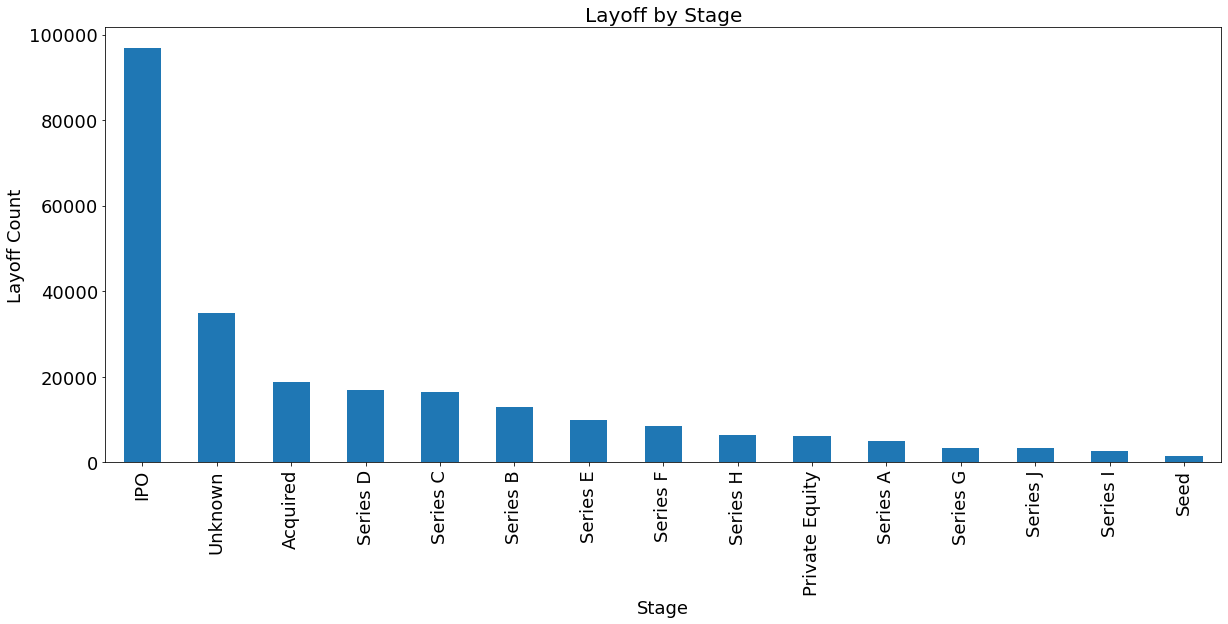

In [38]:
df.groupby('stage')['laid_off_count'].sum().sort_values(ascending=False).plot(kind='bar',figsize=(20,8),fontsize=18)
plt.title('Layoff by Stage',size=20)
plt.xlabel('Stage',size=18)
plt.ylabel('Layoff Count',size=18);

In [39]:
df20 = df.query('year == 2020')
df1 = df20.groupby('month')['laid_off_count'].sum().to_frame()
df1.rename(columns={'laid_off_count':'layoff_2020'},inplace=True)
df1

,layoff_2020
month,
3,9628
4,26710
5,25804
6,7627
7,7112
8,1969
9,609
10,450
11,207


In [40]:
df21 = df.query('year == 2021')
df2 = df21.groupby('month')['laid_off_count'].sum().to_frame()
df2.rename(columns={'laid_off_count':'layoff_2021'},inplace=True)
df2

,layoff_2021
month,
1,6013
2,868
3,47
4,261
5,0
6,2434
7,80
8,1867
9,161


In [41]:
df22 = df.query('year == 2022')
df3 = df22.groupby('month')['laid_off_count'].sum().to_frame()
df3.rename(columns={'laid_off_count':'layoff_2022'},inplace=True)
df3

,layoff_2022
month,
1,510
2,3625
3,5694
4,4064
5,12535
6,17584
7,16223
8,13095
9,5881


In [42]:
df_combined = pd.concat([df3,df2,df1], axis=1)
df_combined

,layoff_2022,layoff_2021,layoff_2020
month,,,
1,510,6013,NaN
2,3625,868,NaN
3,5694,47,9628.0
4,4064,261,26710.0
5,12535,0,25804.0
6,17584,2434,7627.0
7,16223,80,7112.0
8,13095,1867,1969.0
9,5881,161,609.0


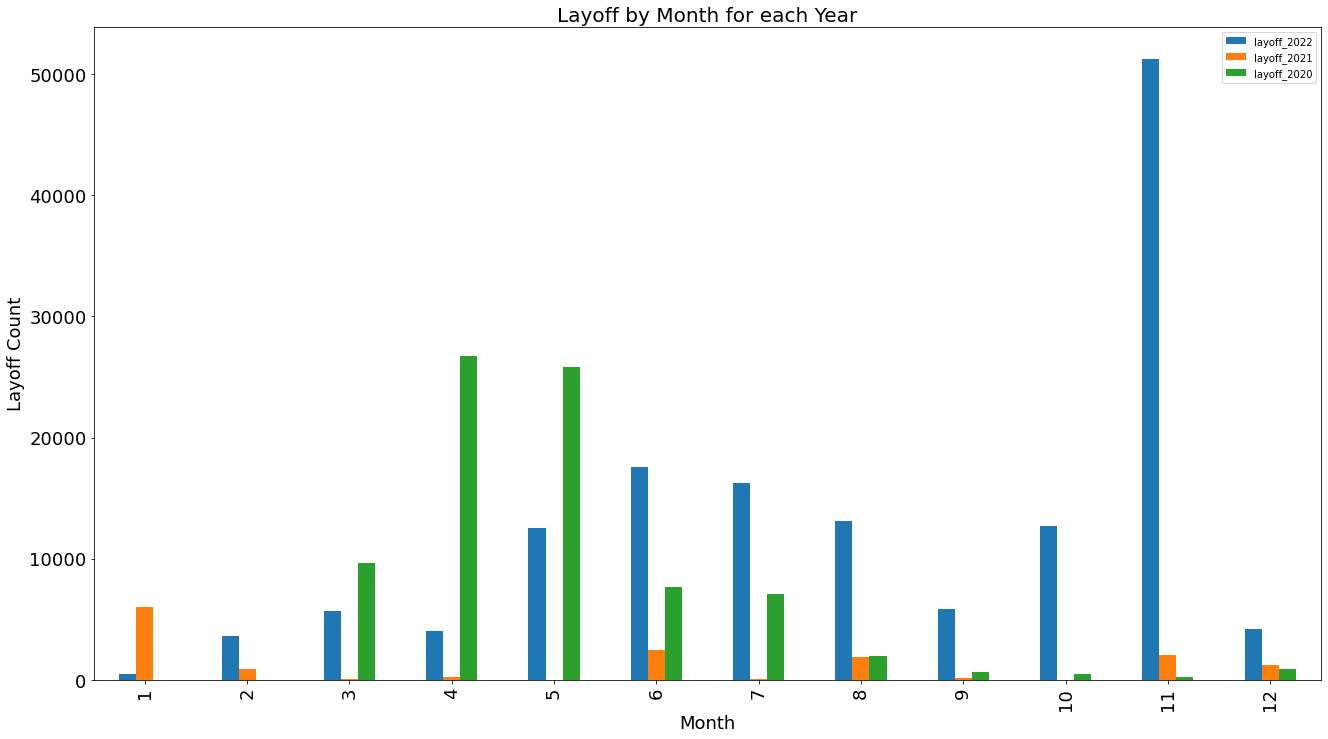

In [43]:
df_combined.plot(kind='bar',figsize=(22,12),fontsize=18)
plt.title('Layoff by Month for each Year',size=20)
plt.xlabel('Month',size=18)
plt.ylabel('Layoff Count',size=18);

In [44]:
df.groupby('industry')['funds_raised'].sum().sort_values(ascending=False)

industry
Media             501983.8000
Transportation    258223.7400
Consumer          117853.3000
Real Estate        96744.5000
Finance            87033.7800
Food               75789.9755
Retail             49155.1000
Healthcare         36667.0000
Travel             28571.5000
Other              23725.0000
Data               17185.6000
Education          16831.8000
Marketing          15149.7000
Security           13406.0000
Crypto             12616.0000
Fitness            11069.6000
Logistics           7950.0000
Infrastructure      5846.0000
Construction        5394.0000
Energy              4052.0000
HR                  3876.7000
Support             3713.6000
Product             3659.2000
Sales               3584.4000
Aerospace           3477.0000
Recruiting          1944.0000
Legal               1140.0000
Unknown              988.0000
Name: funds_raised, dtype: float64

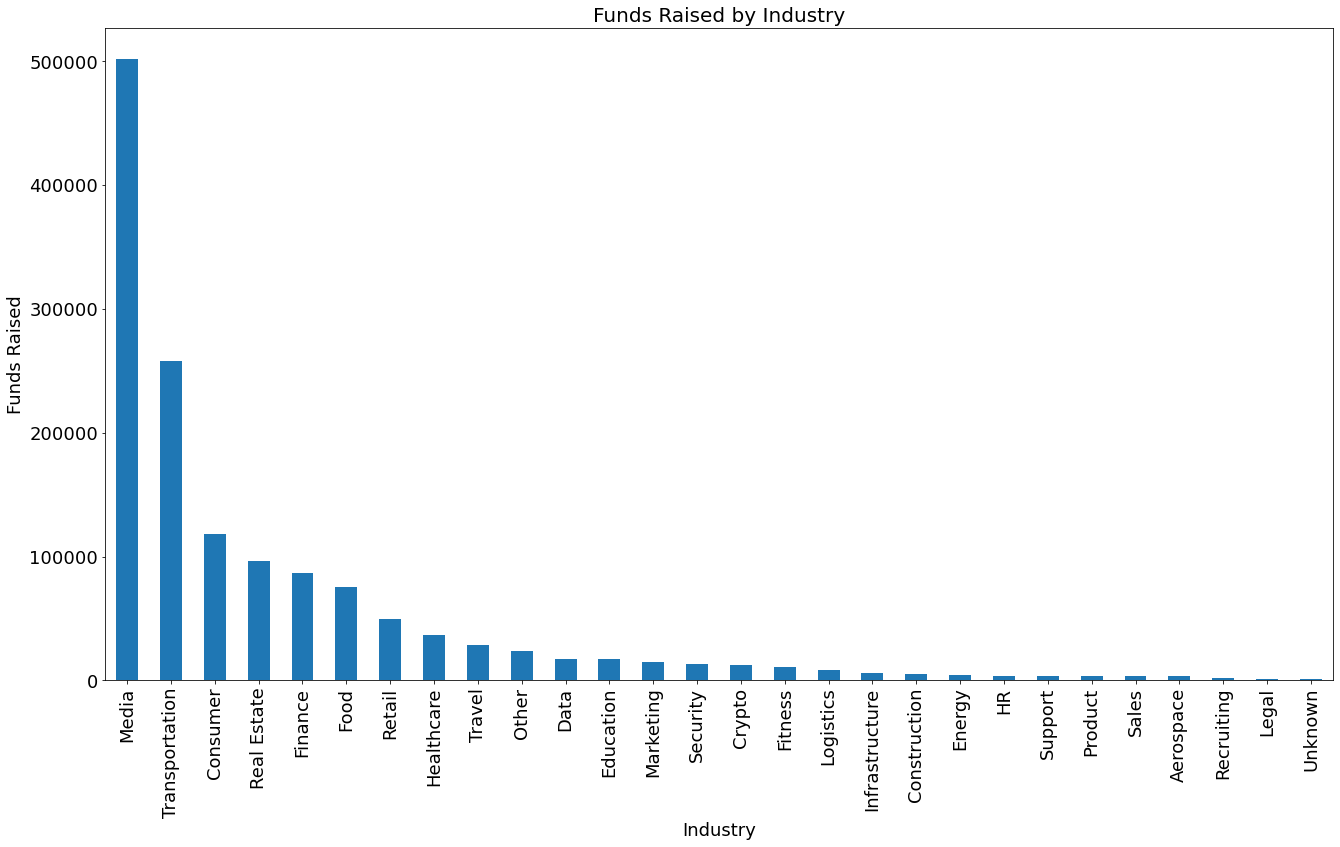

In [45]:
df.groupby('industry')['funds_raised'].sum().sort_values(ascending=False).plot(kind='bar',figsize=(22,12),fontsize=18)
plt.title('Funds Raised by Industry',size=20)
plt.xlabel('Industry',size=18)
plt.ylabel('Funds Raised',size=18);

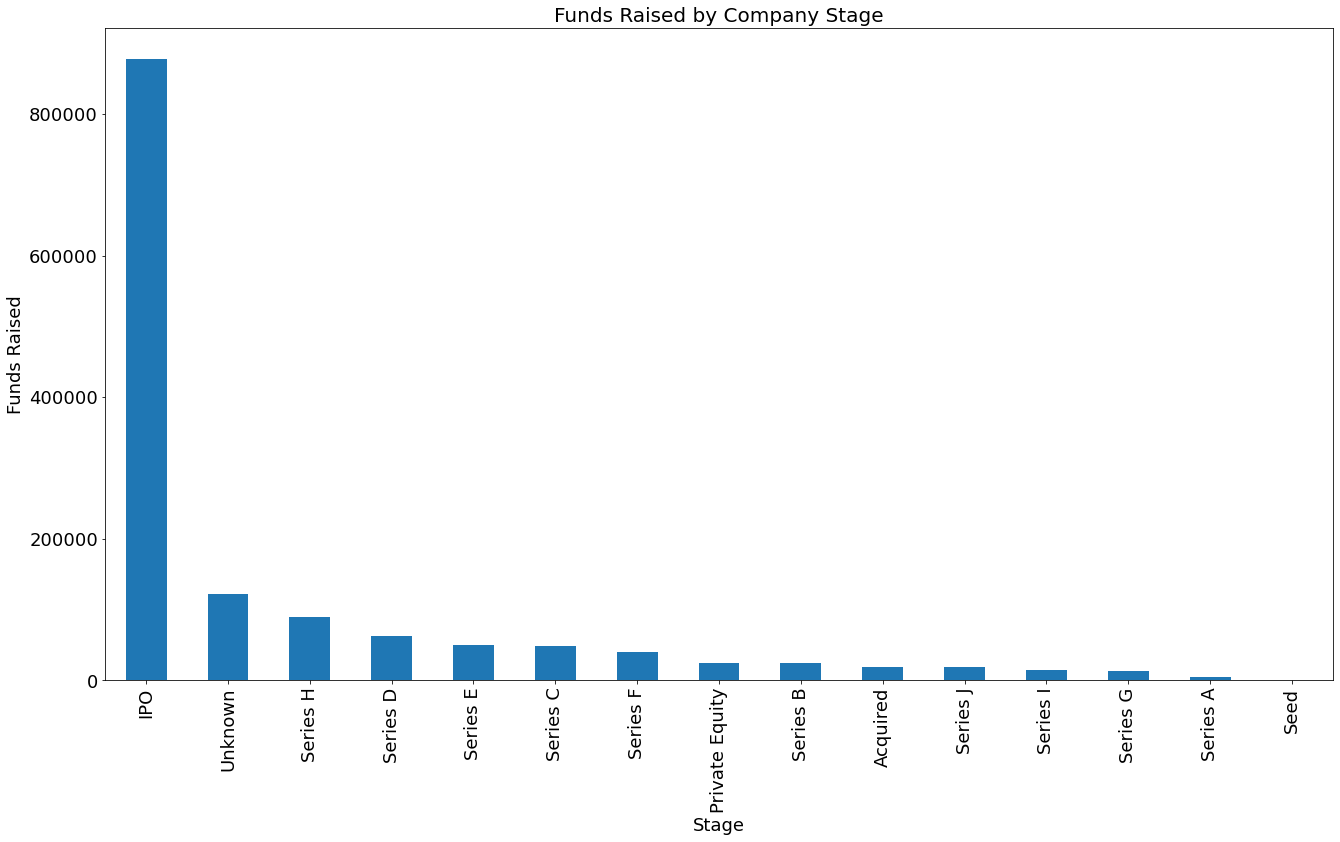

In [46]:
df.groupby('stage')['funds_raised'].sum().sort_values(ascending=False).plot(kind='bar',figsize=(22,12),fontsize=18)
plt.title('Funds Raised by Company Stage',size=20)
plt.xlabel('Stage',size=18)
plt.ylabel('Funds Raised',size=18);

In [47]:
df.groupby('company')['funds_raised'].sum().nlargest(10)

company
Netflix          487600.0
Uber             123500.0
WeWork            43500.0
Bytedance         26200.0
Meta              26000.0
Tesla             20200.0
WeWork            19500.0
Twitter           18600.0
Sea               17200.0
Delivery Hero     16600.0
Name: funds_raised, dtype: float64

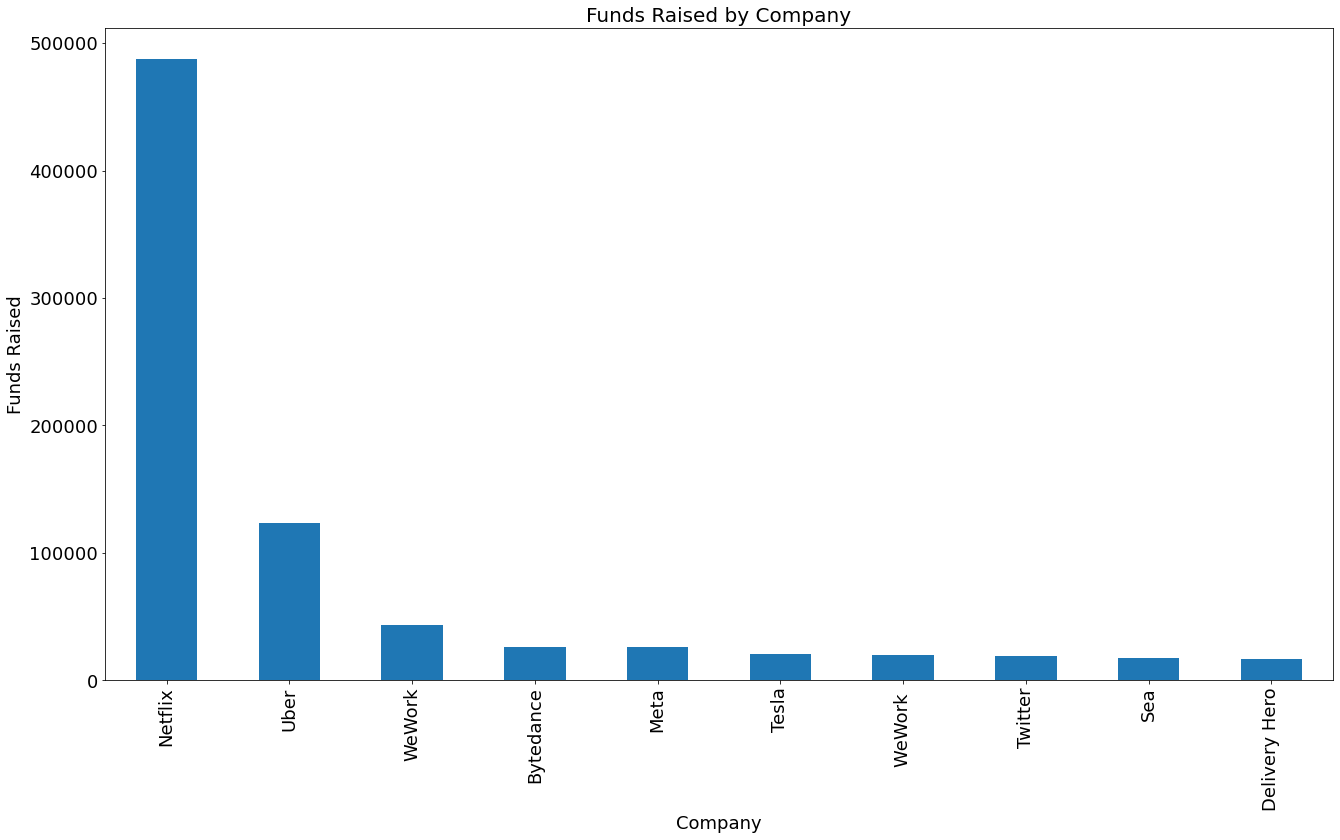

In [48]:
df.groupby('company')['funds_raised'].sum().nlargest(10).plot(kind='bar',figsize=(22,12),fontsize=18)
plt.title('Funds Raised by Company',size=20)
plt.xlabel('Company',size=18)
plt.ylabel('Funds Raised',size=18);

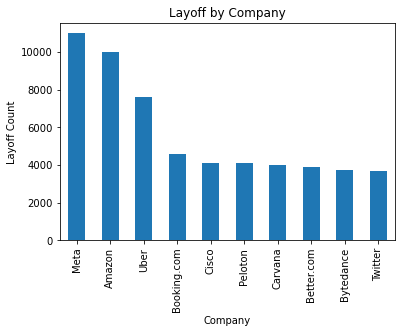

In [49]:
df.groupby('company')['laid_off_count'].sum().nlargest(10).plot(kind='bar')
plt.title('Layoff by Company')
plt.xlabel('Company')
plt.ylabel('Layoff Count');

In [50]:
df_bankrupt = df.query('percentage == 1')
df_bankrupt

,company,location,industry,laid_off_count,date,funds_raised,stage,country,percentage,month,day,year
31,Lora DiCarlo,Bend,Consumer,0,2022-12-02 00:00:00,9.0,Unknown,United States,1.0,12,Friday,2022
53,Bitfront,SF Bay Area,Crypto,0,2022-11-29 00:00:00,0.0,Unknown,United States,1.0,11,Tuesday,2022
67,BlockFi,New York City,Crypto,0,2022-11-28 00:00:00,1000.0,Series E,United States,1.0,11,Monday,2022
79,Assure,Salt Lake City,Finance,0,2022-11-23 00:00:00,2.0,Seed,United States,1.0,11,Wednesday,2022
80,GoodGood,Toronto,Retail,0,2022-11-23 00:00:00,6.0,Seed,Canada,1.0,11,Wednesday,2022
...,...,...,...,...,...,...,...,...,...,...,...,...
1739,Service,Los Angeles,Travel,0,2020-03-20 00:00:00,5.0,Seed,United States,1.0,3,Friday,2020
1742,Ejento,SF Bay Area,Recruiting,84,2020-03-19 00:00:00,0.0,Unknown,United States,1.0,3,Thursday,2020
1746,Popin,New York City,Fitness,0,2020-03-19 00:00:00,13.0,Unknown,United States,1.0,3,Thursday,2020
1750,Help.com,Austin,Support,16,2020-03-16 00:00:00,6.0,Seed,United States,1.0,3,Monday,2020


In [51]:
df_bankrupt.shape[0]

100

In [52]:
df_bankrupt.year.value_counts()

2022    56
2020    36
2021     8
Name: year, dtype: int64

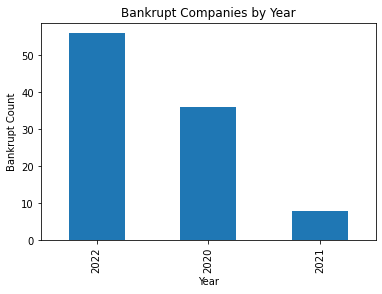

In [53]:
df_bankrupt.year.value_counts().plot(kind='bar')
plt.title('Bankrupt Companies by Year')
plt.xlabel('Year')
plt.ylabel('Bankrupt Count');

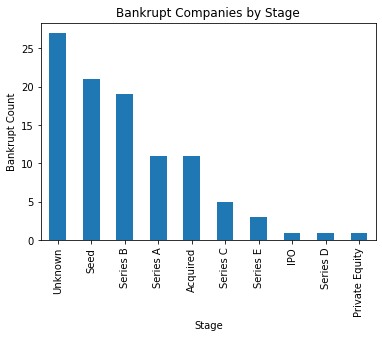

In [54]:
df_bankrupt.stage.value_counts().plot(kind='bar')
plt.title('Bankrupt Companies by Stage')
plt.xlabel('Stage')
plt.ylabel('Bankrupt Count');

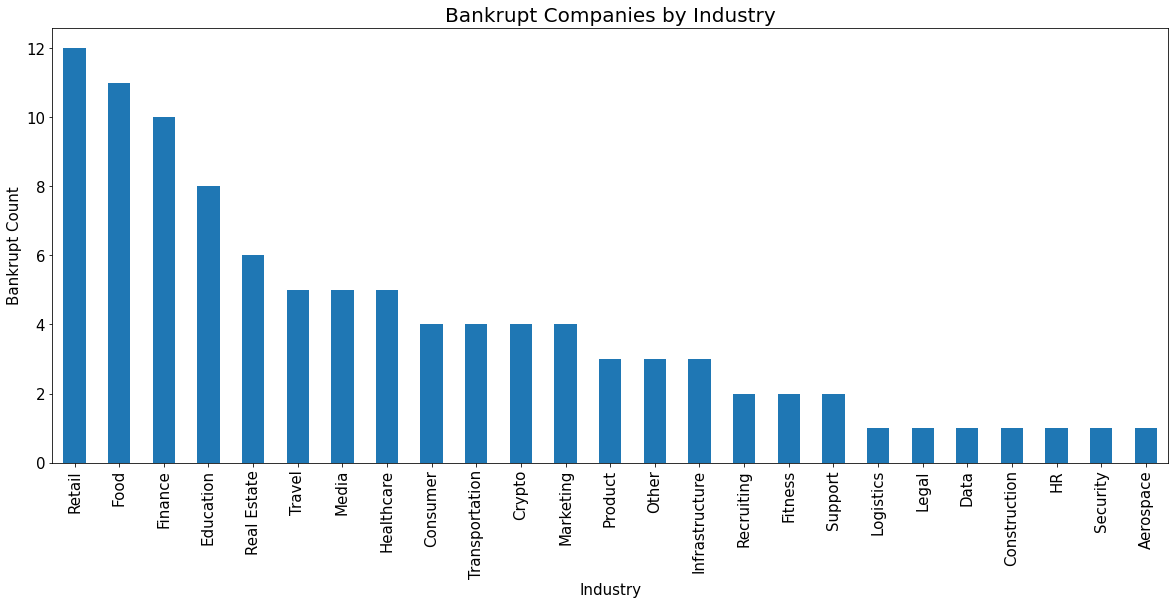

In [55]:
df_bankrupt.industry.value_counts().plot(kind='bar',figsize=(20,8),fontsize=15)
plt.title('Bankrupt Companies by Industry',size=20)
plt.xlabel('Industry',size=15)
plt.ylabel('Bankrupt Count',size=15);

In [56]:
df_US = df.query('country == "United States"')

In [59]:
df_US.location.nunique()

77

In [60]:
df_US.groupby('location')['laid_off_count'].sum().nlargest(20)

location
SF Bay Area        79810
New York City      21986
Seattle            16051
Boston              7311
Los Angeles         5743
Chicago             5289
Phoenix             4113
Philadelphia        2340
Miami               2119
Austin              1892
Atlanta             1461
Detroit             1180
San Luis Obispo     1100
Stamford             964
Columbus             933
Washington D.C.      867
San Diego            815
Salt Lake City       808
Las Vegas            405
Denver               400
Name: laid_off_count, dtype: int64

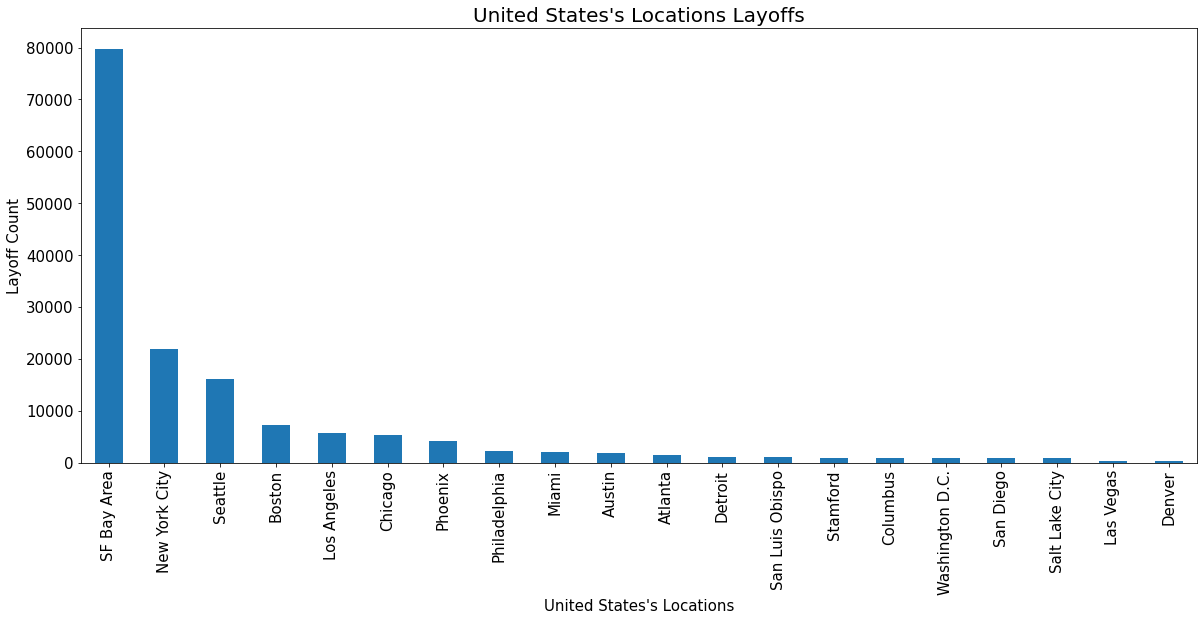

In [61]:
df_US.groupby('location')['laid_off_count'].sum().nlargest(20).plot(kind='bar',figsize=(20,8),fontsize=15)
plt.title("United States's Locations Layoffs",size=20)
plt.xlabel("United States's Locations",size=15)
plt.ylabel("Layoff Count",size=15);

In [68]:
df.to_excel('Final_Projects_Layoffs_2.xlsx')